In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('Admission_Predict.csv')

In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.shape

(400, 9)

In [7]:
from sklearn.preprocessing import Binarizer 
bi = Binarizer (threshold=0.75)
df['Chance of Admit '] = bi.fit_transform(df[['Chance of Admit ']])

In [8]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [9]:
x=df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']

In [10]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [11]:
y=y.astype('int')

In [12]:
y

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int64

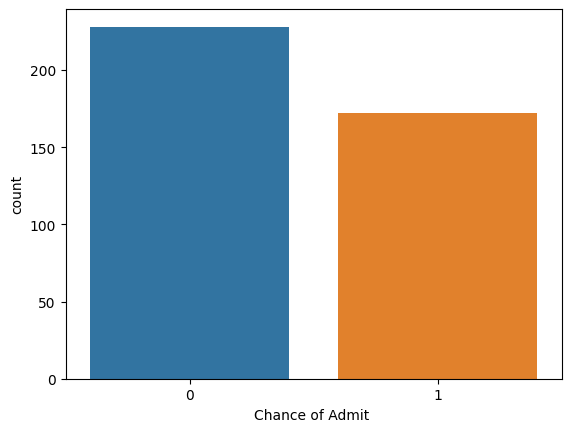

In [13]:
sns.countplot(x=y);

In [14]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.25)



In [15]:
x_train.shape

(300, 8)

In [16]:
x_test.shape

(100, 8)

In [17]:
y_train.shape

(300,)

In [18]:
y_test.shape

(100,)

In [19]:
from sklearn.tree import DecisionTreeClassifier 

In [20]:
classifier = DecisionTreeClassifier(random_state=0)

In [23]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [25]:
y_pred = classifier.predict(x_test)

In [28]:
result=pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

In [29]:
result

,actual,predicted
132,0,0
309,0,0
341,1,1
196,0,0
246,0,1
...,...,...
146,0,0
135,1,1
390,0,0
264,0,0


In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report 

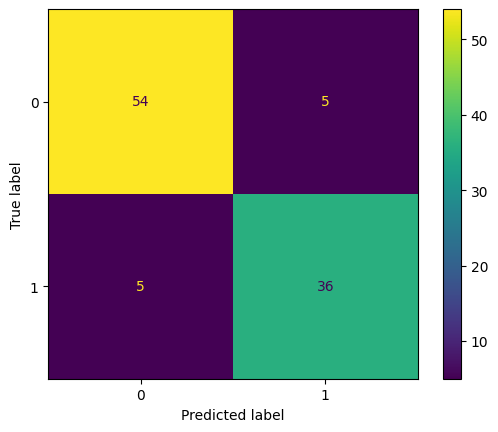

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [32]:
accuracy_score(y_test, y_pred)

0.9

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.88      0.88      0.88        41

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [42]:
#for new input
new=[[397,325,107,3, 3.0, 3.5, 9.11,1]]
classifier.predict(new)[0]

/home/siddhi/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

In [45]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

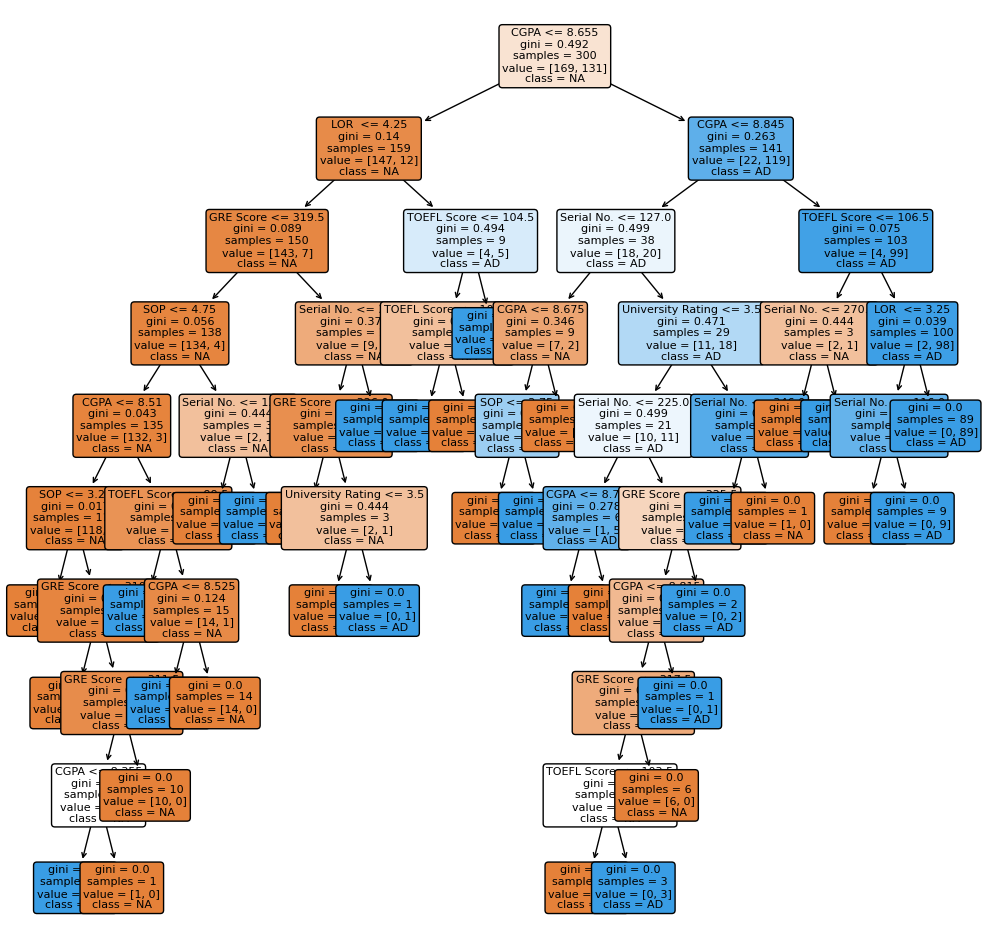

In [49]:
plt.figure(figsize=(12,12))
plot_tree(classifier, fontsize=8, filled=True, rounded=True, feature_names=x.columns, class_names=['NA', 'AD']);